In [40]:
import vaex
import illustris_python as il
import numpy as np
import matplotlib as mpl
import shared
import matplotlib.pyplot as plt
from itertools import islice

In [2]:
base_path = "/Users/users/nastase/PROJECT/"

In [79]:
def random_sample_particles(snapshot, x_min, x_max, y_min, y_max): #, z_min, z_max
    
    
    # Assuming dm_pos is a dictionary with keys 'Coordinates' and 'ParticleIDs'
    dm_pos = il.snapshot.loadSubset(base_path, snapshot, 'dm', ['Coordinates', 'ParticleIDs'])

    # Extracting coordinates
    coordinates = dm_pos['Coordinates']
    particle_ids = dm_pos['ParticleIDs']
    x_coords = coordinates[:, 0]
    y_coords = coordinates[:, 1]
#     z_coords = coordinates[:, 2]

    # Finding indices of particles within the specified range
    indices = np.where(
        (x_coords >= x_min) & (x_coords <= x_max) &
        (y_coords >= y_min) & (y_coords <= y_max) #&
#         (z_coords >= z_min) & (z_coords <= z_max)
    )[0]
    
    particles_within_range = {
        'ParticleIDs': particle_ids[indices],
        'Coordinates': coordinates[indices]
    } 
    
    redshift = snapshot_redshifts.get(snapshot)
    plt.hist2d(particles_within_range['Coordinates'][:,0], particles_within_range['Coordinates'][:,1], norm=mpl.colors.LogNorm(), bins=256)
    plt.title(f'DM distribution at snapshot:{snapshot}, z = {redshift}')
    plt.xlabel('x [ckpc/h]')
    plt.ylabel('y [ckpc/h]')
    plt.colorbar()
    plt.savefig(f'Data/W2_mass_movements/DM_movements_now_to_earlier/void1.{snapshot}.png')
    
    plt.close()


    return particles_within_range

In [81]:
for snapshot_number in islice(snapshot_redshifts.keys(), 5):
    random_sample_particles(snapshot_number, 30000,40000, 20000, 30000)
    

In [82]:
for snapshot_number in snapshot_redshifts.keys():
    random_sample_particles(snapshot_number, 30000,40000, 20000, 30000)

In [83]:
snapshot_redshifts

{51: '4.66',
 53: '4.18',
 54: '4.01',
 56: '3.71',
 58: '3.28',
 60: '3.01',
 62: '2.73',
 64: '2.44',
 66: '2.21',
 70: '1.82',
 74: '1.53',
 78: '1.30',
 82: '1.11',
 86: '0.99',
 90: '0.85',
 94: '0.73',
 98: '0.62',
 102: '0.52',
 106: '0.44',
 110: '0.36',
 114: '0.29',
 118: '0.23',
 122: '0.17',
 123: '0.15',
 125: '0.13',
 127: '0.10',
 129: '0.07',
 131: '0.05',
 133: '0.02',
 135: '0.00'}

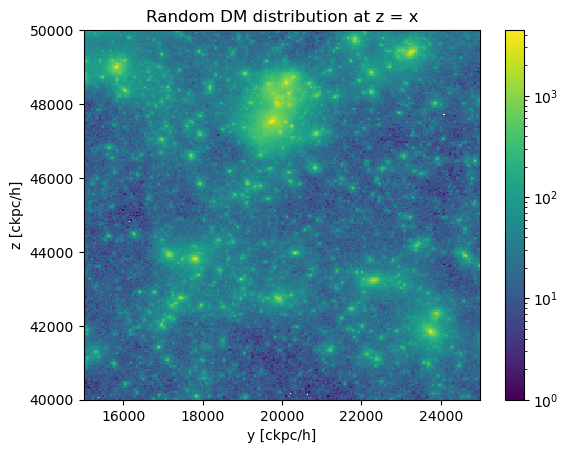

In [75]:
plt.hist2d(particles['Coordinates'][:,0], particles['Coordinates'][:,1], norm=mpl.colors.LogNorm(), bins=256)
# plt.xlim([0,75000])
# plt.ylim([0,75000])
plt.title(f'Random DM distribution at z = x')
plt.xlabel('y [ckpc/h]')
plt.ylabel('z [ckpc/h]')
plt.colorbar()
# plt.savefig('Data/W2_mass_movements/random_matter_129.png')

In [76]:
particles

{'ParticleIDs': array([32968543, 36253968, 29689043, ..., 56517720, 56517745, 56517820],
       dtype=uint64),
 'Coordinates': array([[19752.85 , 47539.44 , 49008.516],
        [19752.7  , 47542.203, 49009.96 ],
        [19753.451, 47542.32 , 49005.54 ],
        ...,
        [24664.361, 48217.047, 72537.96 ],
        [24366.793, 48271.805, 72380.97 ],
        [24359.102, 48282.2  , 72735.07 ]], dtype=float32)}

In [ ]:
dm_pos = il.snapshot.loadSubset(base_path,135,'dm',['Coordinates'])